# Text_Summerizer

## Introduction

## Import_Required_Libraries

In [1]:
from transformers import pipeline
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

## Load_BART_Summerization_Model

In [2]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
print("✅ BART model loaded successfully!")

Device set to use cpu


✅ BART model loaded successfully!


## Web_Text_Summerization

In [3]:
#Summarize Any Web Article

def extract_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    paragraphs = soup.find_all("p")
    text = " ".join([p.get_text() for p in paragraphs])
    return text

In [4]:
#  Provide URL 
user_url = input("Enter a URL to summarize : ")
web_text = extract_text_from_url(user_url)

Enter a URL to summarize :  https://en.wikipedia.org/wiki/Data_science


In [5]:
# Summarize with chunking if needed

def summarize_long_text(text, chunk_size=1024):
    chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    final_summary = ""
    for chunk in chunks:
        summary = summarizer(chunk, max_length=150, min_length=50, do_sample=False)
        final_summary += summary[0]['summary_text'] + "\n"
    return final_summary.strip()

summary = summarize_long_text(web_text)
print("\n📄 Summary:\n", summary)

Your max_length is set to 150, but your input_length is only 87. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=43)



📄 Summary:
 Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processing, scientific visualization, algorithms and systems to extract or extrapolate knowledge from potentially noisy, structured, or unstructured data. Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine)
Data science is an interdisciplinary field focused on extracting knowledge from typically large data sets. The field encompasses preparing data for analysis, formulating data science problems, analyzing data, and summarizing these findings. It incorporates skills from computer science, mathematics, data visualization, graphic design, communication, and business.
In 1962, John Tukey described a field he called "data analysis", which resembles modern data science. In 1985, in a lecture given to the Chinese Academy of Sciences in Beijing, C.F. Jeff Wu used the term

## Visualization

### Word Cloud of PDF Text

C:\Users\Ranadeep Reddy\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


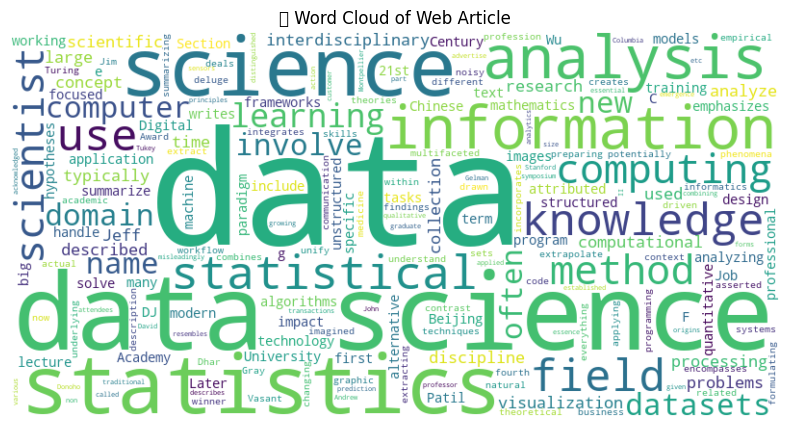

In [6]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(web_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("📊 Word Cloud of Web Article")
plt.show()

###  Sentence Length Distribution

C:\Users\Ranadeep Reddy\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


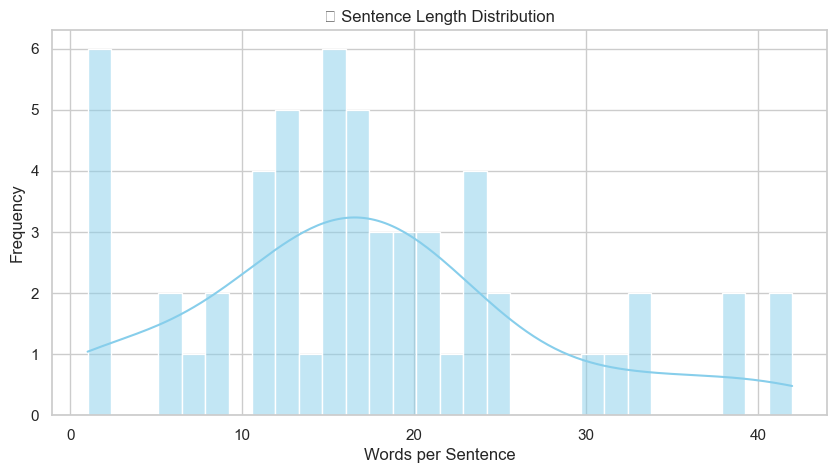

In [7]:
sentences = web_text.split('.')
lengths = [len(s.split()) for s in sentences if len(s.split()) > 0]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(lengths, bins=30, kde=True, color="skyblue")
plt.title("📊 Sentence Length Distribution")
plt.xlabel("Words per Sentence")
plt.ylabel("Frequency")
plt.show()

## Conclusion / Result

In [ ]:
# 📄 Text Summarizer using HuggingFace Transformers (BART)

This project summarizes text from web pages and PDF files using the powerful `facebook/bart-large-cnn` model. It includes data extraction, summarization, and visualizations using Jupyter Notebook.

---

## ✅ 1. Install & Import Libraries
```python
!pip install transformers pdfplumber beautifulsoup4 wordcloud seaborn matplotlib

from transformers import pipeline
from bs4 import BeautifulSoup
import requests
import pdfplumber
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
```

---

## ✅ 2. Load BART Summarization Model
```python
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
print("✅ BART model loaded successfully!")
```

---

## 🌐 3. Summarize Wikipedia Article
```python
def extract_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    paragraphs = soup.find_all("p")
    text = " ".join([p.get_text() for p in paragraphs])
    return text

url = "https://en.wikipedia.org/wiki/Deep_learning"
wiki_text = extract_text_from_url(url)

wiki_summary = summarizer(wiki_text[:1024], max_length=150, min_length=50, do_sample=False)
print("📄 Summary:\n", wiki_summary[0]['summary_text'])
```

---

## 📄 4. Extract & Summarize PDF
```python
def extract_text_from_pdf(path):
    text = ""
    with pdfplumber.open(path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

pdf_path = "Ranadeep_Resume.pdf"
pdf_text = extract_text_from_pdf(pdf_path)
```

```python
def summarize_long_text(text, chunk_size=1024):
    chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    final_summary = ""
    for chunk in chunks:
        summary = summarizer(chunk, max_length=150, min_length=50, do_sample=False)
        final_summary += summary[0]['summary_text'] + "\n"
    return final_summary.strip()

summary = summarize_long_text(pdf_text)
print("📄 Summary of PDF:\n", summary)
```

---

## 📊 5. Visualizations
### 🔸 Word Cloud
```python
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pdf_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("📊 Word Cloud of PDF Text")
plt.show()
```

### 🔸 Sentence Length Distribution
```python
sentences = pdf_text.split('.')
lengths = [len(s.split()) for s in sentences if len(s.split()) > 0]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(lengths, bins=30, kde=True, color="skyblue")
plt.title("📊 Sentence Length Distribution")
plt.xlabel("Words per Sentence")
plt.ylabel("Frequency")
plt.show()
```

---

## ✅ Conclusion
```markdown
- Summarized both web and PDF content using the BART model.
- Visualized text structure using WordCloud and histogram.
- This notebook is useful for resume screening, document summarization, and more.
```

---

## 📦 requirements.txt (for GitHub)
```
transformers
pdfplumber
beautifulsoup4
wordcloud
matplotlib
seaborn
```
